In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import simulator
from environment import RectangularEnvironment
from targets import PointTarget
from vis import TrackingVis
from sensors import OmniSensor
from pubsub import Broker, Subscriber, Publisher
from tracker import KalmanTracker
from scheduler import SimpleScheduler
import time
from IPython.display import display

%matplotlib notebook

<IPython.core.display.Javascript object>


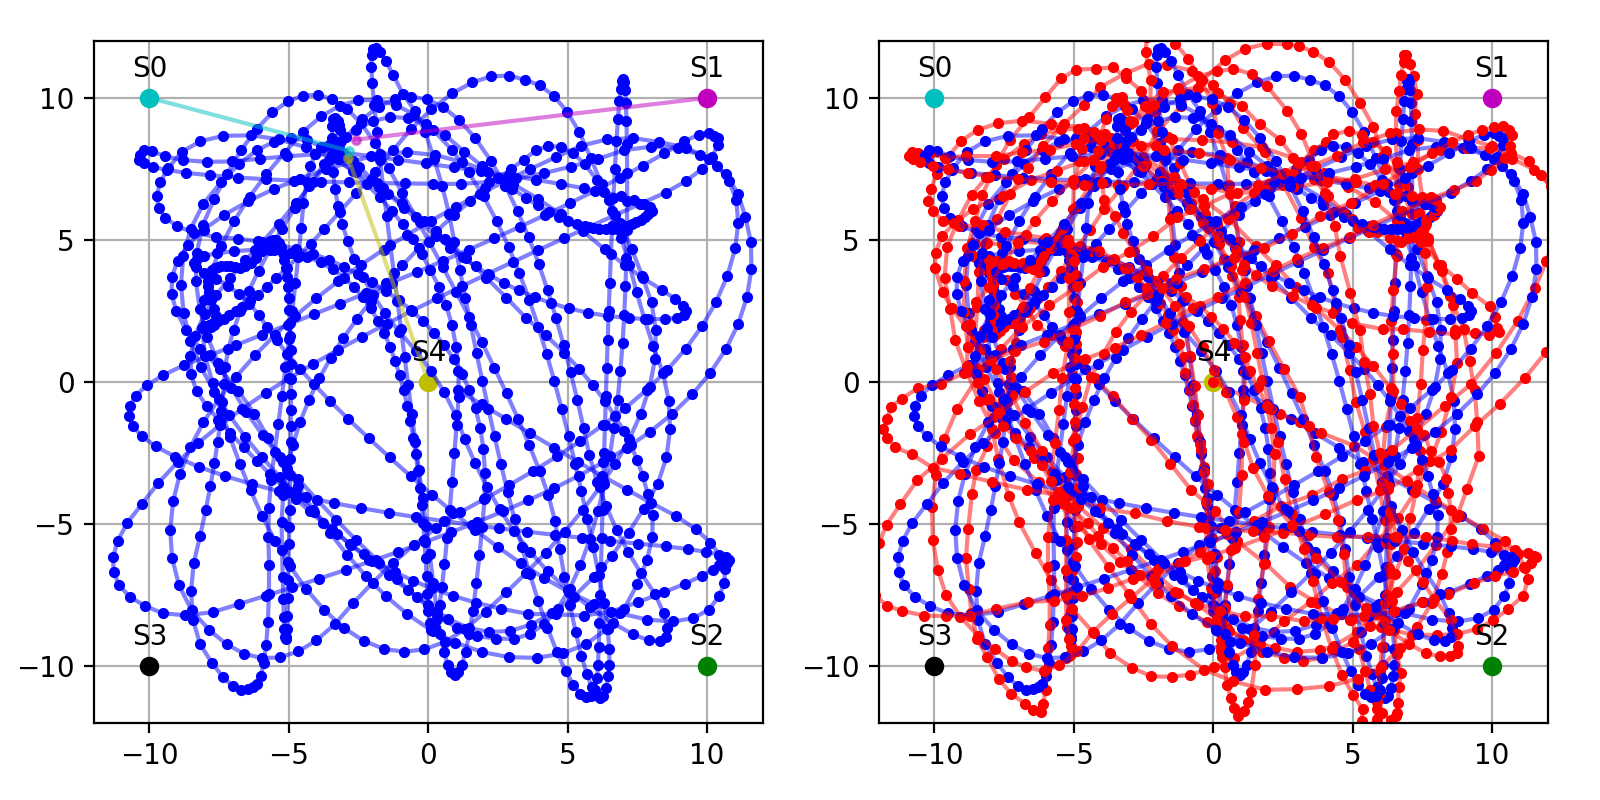

In [6]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker)

#Create sensors
sensor0 = OmniSensor(np.array([-10,10]),id="S0",color="c",broker=broker)
sensor1 = OmniSensor(np.array([10,10]),id="S1",color="m",broker=broker)
sensor2 = OmniSensor(np.array([10,-10]),id="S2",color="g",broker=broker)
sensor3 = OmniSensor(np.array([-10,-10]),id="S3",color="k",broker=broker)
sensor4 = OmniSensor(np.array([0,0]),id="S4",color="y",broker=broker)

#Create a single object tracker
tracker1 = KalmanTracker(id="KT1",color="r",broker=broker)

#Create a resource scheduler
sched1 = SimpleScheduler(id="Sched1",max_sensors=3,broker=broker,sensors=[sensor0,sensor1,sensor2,sensor3,sensor4])

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(sensor0)
sim.add_object(sensor1)
sim.add_object(sensor2)
sim.add_object(sensor3)
sim.add_object(sensor4)
sim.add_object(tracker1)
sim.add_object(sched1)

In [8]:
#Run the simulator
sim.run(1000)